<a href="https://colab.research.google.com/github/Lets21/APIJUego/blob/master/Copia_de_MS2_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilities

## Tossing a coin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(prob=0.5):
    # prob: probability of success
    if np.random.rand() < prob:
        return 1
    else:
        return 0

n = 100
coin = np.array([0, 0])
for i in range(n):
    coin[bernoulli()] += 1
coin = coin / n
p = plt.bar(range(2), coin)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Tossing two coins



In [ ]:
n = 100
two_coins = np.array([0, 0, 0])
for i in range(n):
    two_coins[bernoulli() + bernoulli()] += 1
two_coins = two_coins / n
p = plt.bar(range(3), two_coins)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Rolling a dice

In [ ]:
n = 100
dice = np.zeros(6)
for i in range(n):
    face = int(np.floor(np.random.rand()*6))
    dice[face] += 1
dice = dice / n
p = plt.bar(range(1,7), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Rolling two dices

In [ ]:
n = 100
dice = np.zeros(11)
for i in range(n):
    face1 = int(np.floor(np.random.rand()*6))
    face2 = int(np.floor(np.random.rand()*6))
    dice[face1+face2] += 1
dice = dice / n
p = plt.bar(range(2,13), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Probability of having three kids of the same sex

**Assignment 1**: How likely is it that a family with three children has all boys or all girls?
Let's assume that a child is equally likely to be a boy or a girl. Instead of observing the result of actual births, a toss of a fair coin could be used to simulate a birth. If the toss results in heads (H), then we could say a boy was born; if the toss results in tails (T), then we could say a girl was born. If the coin is fair (*i.e.*, heads and tails are equally likely), then getting a boy or a girl is equally likely.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(prob=0.5):
    # prob: Probabilidad de éxito (en este contexto, probabilidad de tener un niño)
    if np.random.rand() < prob:
        return 1  # Niño
    else:
        return 0  # Niña

def simular_familias(rep=100000, hijos=3):
    # rep: Número de familias a simular
    # hijos: Número de hijos por familia
    resultados = np.zeros(rep)  # Almacenar resultados de las simulaciones

    for i in range(rep):
        familia = sum([bernoulli() for _ in range(hijos)])  # Suma total de niños en la familia
        if familia == 0 or familia == hijos:
            resultados[i] = 1  # Familia con todos niñas o todos niños

    probabilidad = np.mean(resultados)  # Calcular probabilidad
    return probabilidad

# Simular 100,000 familias con 3 hijos cada una
probabilidad = simular_familias(rep=100000, hijos=3)
print(f"La probabilidad de que una familia con tres hijos tenga todos niños o todas niñas es de {probabilidad:.2f}")


## A simple game

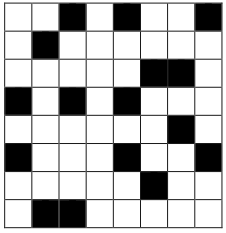

**Assigment 2**: Considering the board shown above, implement the following system: There are 2 mines distributed randomly in the black squares, and the player clicks randomly on the squares (never on the white ones): If there is no mine in the square, it becomes white, otherwise the player loses the game.
If the player manages to click all the squares that do not have a mine, he/she win the game.  Do not take into account the distribution (or proximity) of the black boxes.

In [ ]:
# Let's correct the game simulation according to the coin toss logic provided

import numpy as np
from scipy.stats import bernoulli

# First, we will use the coin toss logic to determine the mine placement
def place_mines_with_coins(hidden, mines):
    # This function simulates the placement of mines based on coin tosses
    mine_positions = []
    while len(mine_positions) < mines:
        # Each black square has a unique id from 0 to (hidden-1)
        # We simulate the coin tosses to assign mines to these ids
        position = bernoulli.rvs(0.5) + bernoulli.rvs(0.5)
        # We ensure unique positions for each mine
        if position not in mine_positions:
            mine_positions.append(position)
    return mine_positions

# Now the main game function
def play(size=64, hidden=16, mines=2):
    # Initialize the board with no mines
    board = ['safe'] * size

    # Get mine positions from coin toss logic
    mine_positions = place_mines_with_coins(hidden, mines)
    # Convert positions to indices in the board
    mines_indices = [random.choice([i for i in range(size) if board[i] == 'safe' and i not in mine_positions])
                     for _ in mine_positions]

    for idx in mines_indices:
        board[idx] = 'mine'  # Place a mine

    # Initialize game variables
    win = False
    clicks = 0
    black_squares = set(range(size)) - set(mines_indices)

    # Simulate the game
    while black_squares:
        click = random.choice(list(black_squares))
        clicks += 1

        # Check if there's a mine
        if board[click] == 'mine':
            win = False
            break

        # If no mine, remove the black square
        black_squares.remove(click)

        # If all safe squares have been revealed, player wins
        if len(black_squares) == len(mine_positions):
            win = True
            break

    return win, clicks

# Play the game
win, _ = play(8*8, 16, 2)
print("You won" if win else "You lost")


You won


**Assignment 3**: What is the probability of winning the game?


In [ ]:
def play(size=64, hidden=16, mines=2):
    # Initialize the game with all squares safe
    board = ['safe'] * size
    # Determine black square positions
    black_squares_indices = random.sample(range(size), hidden)
    # Place mines randomly among black squares
    mines_indices = set(random.sample(black_squares_indices, mines))
    for idx in mines_indices:
        board[idx] = 'mine'

    # Start clicking on black squares until mines are clicked or all safe squares are revealed
    black_squares = set(black_squares_indices)
    while black_squares:
        # Randomly choose a black square to click on
        click = black_squares.pop()

        # Check if clicked square is a mine
        if board[click] == 'mine':
            return False  # Game lost

        # If all non-mine black squares are revealed, win the game
        if len(black_squares) == mines:
            return True  # Game won

# Run the simulation for a smaller number of repetitions to estimate winning probability
rep = 100000  # Reduced the number for efficiency
wins = sum(play() for _ in range(rep))
winning_probability = wins / rep
winning_probability


**Assigment 4**: How many clicks on average will a player make until they lose (include the click in which they find the mine)?

In [ ]:
rep = 100000
## WRITE YOUR CODE HERE

## --------------------